<a href="https://colab.research.google.com/github/GUSTAVObbarbosa/ferramentas_survey123/blob/main/Modelo_de_detec%C3%A7%C3%A3o_de_fraude_de_cart%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Detecção de Fraudes de Cartões de Crédito

Como sabemos, as fraudes em cartões de crédito tem crescido cada dia mais. Com o avanço das tecnologias, os golpistas também se modernizam para realizar essas fraudes.

O objetivo desse projeto é desenvolver um modelo de detecção de fraude de cartões de crédito, de forma a auxiliar na tomada de decisão para ações em caso de possível fraude detectada.

##Dados utilizados

Os dados utilizadas para elaboração e treino do modelo foram disponibilizados pela European cardholders e registros de transações realziadas em setembro de 2013.

Todas as variáves do dataset estão identificadas como "V1", "V2", "V3" e assim adiante e são o principal componente obtido através de PCA (<i>Principal Component Analysis</i>) possibilitando a correlação entre variáveis.

Somente as variáeis "Time", "Amount" e "Class" não foram convertidas, onde:
* Time: tempo em segundos entre cada transação e também indica a primeira transação;
* Amount: valor da transação;
* Class: indica se houve fraude ou não, sendo 1 = Fraude e 0 = Não fraude.

Resumo do dataset:
- Variáveis: 28
- Entradas: 284.807
- Fraudes: 492 (ou 0,172%)

In [ ]:
#Importando o dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

creditcard= "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

df = pd.read_csv(creditcard)

In [ ]:
#Verificar as primeiras entradas do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Distribuição da feature "Class"
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

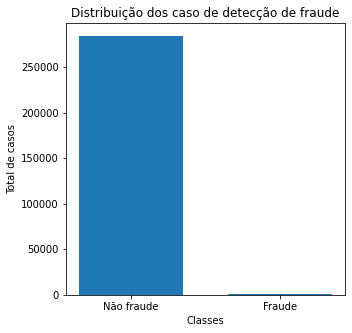

In [ ]:
plt.rcParams['font.family']='Arial'

fig, ax = plt.subplots(figsize=(5,5))

x = ['Não fraude', 'Fraude']
y = df['Class'].value_counts()

ax.set_title('Distribuição dos caso de detecção de fraude')
ax.set_ylabel('Total de casos')
ax.set_xlabel('Classes')

plt.bar(x,y, width=0.7) 

plt.show()

Uma vez que o objetivo do nosso projeto é verificar a probabilidade de que determinada transação é uma fraude ou não e, tendo em vista que nosso dataset possui um conjunto de variáveis (28 variáveis), iremos verificar duas metodologias de predição para comparação: <b>Regressão Logística</b> e <b>Regressão Linear Múltipla</b>. A partir do relatório de classificação, iremos definir qual dos dois modelos iremos utilizar.

##Regressão Logística

In [ ]:
#Bibliotecas utilizadas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#1. Importar modelo
from sklearn.linear_model import LogisticRegression

#2. Definir hiperparametros
model = LogisticRegression()

#3.1. Definir variável X (matriz) e y (alvo)
X = df.drop('Class', axis=1)
y = df['Class']

#3.2. Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

#3.3. Padronizar os dados de teste
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#4. Treinar modelo
model.fit(X_train, y_train)

#5. Fazer previsões em cima dos dados novos
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [ ]:
#Imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71105
           1       0.82      0.69      0.75        97

    accuracy                           1.00     71202
   macro avg       0.91      0.85      0.87     71202
weighted avg       1.00      1.00      1.00     71202



Avaliando o relatório de classificação, temos os seguintes dados para o <b>Modelo de Regressão Logística</b>:
* Precision (acurácia) = 82%
* Recall (% de casos positivos encontrados) = 69%
* f1-score (% de casos positivos identificados de forma correta = 75%

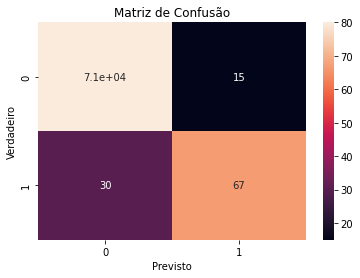

In [ ]:
#Matriz de Confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, vmax=80)

ax.set_title('Matriz de Confusão')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

plt.show()

Avaliando a Matriz de Confusão, temos os seguintes dados:
* Verdadeiro negativo (TN): 71.090 (99,8%)
* Verdadeiro positivo (TP): 67 (0,0009%)
* Falso negativo (FN): 30 (0,0004%)
* Falso positivo (FP): 15 (0,0002%)

##Regressão Linear Múltipla

In [ ]:
#1. Importar modelo
from sklearn.linear_model import LinearRegression

#2. Definir hiperparametros
model2 = LinearRegression()

#3.1. Definir variável X (matriz) e y (alvo)
X2 = df.drop('Class', axis=1)
y2 = df['Class']

#3.2. Dividir o dataset em treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)

#3.3. Padronizar os dados de teste
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)

#4. Treinar modelo
model.fit(X2_train, y2_train)

#5. Fazer previsões em cima dos dados novos
X2_test = scaler.transform(X2_test)
y2_pred = model.predict(X2_test)

In [ ]:
#Imprimir relatório de classificação
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71075
           1       0.87      0.56      0.68       127

    accuracy                           1.00     71202
   macro avg       0.93      0.78      0.84     71202
weighted avg       1.00      1.00      1.00     71202



Para o <b>Modelo de Regressão Linear Múltilpo</b>, os dados foram:
* Precision (acurácia) = 87%
* Recall (% de casos positivos encontrados) = 56%
* f1-score (% de casos positivos identificados de forma correta = 68%




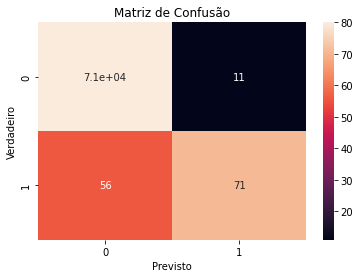

In [ ]:
#Matriz de Confusão
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y2_test, y2_pred), annot=True, ax=ax, vmax=80)

ax.set_title('Matriz de Confusão')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

plt.show()

Avaliando a Matriz de Confusão, temos os seguintes dados:
* Verdadeiro negativo (TN): 71.064 (99,8%)
* Verdadeiro positivo (TP): 71 (0,0009%)
* Falso negativo (FN): 56 (0,0007%)
* Falso positivo (FP): 11 (0,0001%)

##Conclusão

Sendo assim, comparando os dois modelos, notamos que o modelo de <b>Regressão Logística</b> apresentou um desempenho um pouco melhor. Quando comparamos o f1-score, temos 75% para a Regressão Logística e 68% para a Regressão Linear Múltipla. Dessa forma, o modelo recomendado para utilização de detecção de frudes de crtão de crétido, é o de Regressão Logística.